In [81]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import wrangle
import env

In [82]:
# use a function to connect to and pull in data from SQL
df = wrangle.read_curriculum_logs()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [83]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 109.9+ MB


In [84]:
# check observation where path is null
df[df.path.isnull()]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
506305,2020-04-08,09:25:18,NaN,586,55.0,72.177.240.51,55.0,Curie,#curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,NaN,3.0


In [85]:
# fill null value & check that there are no nulls
df.path = df.path.fillna('/')
df.path.isnull().sum()

0

In [86]:
# concatenate date and time columns
df['date'] = df.date + ' ' + df.time
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26 09:55:03,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26 09:56:02,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26 09:56:05,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26 09:56:06,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26 09:56:24,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [87]:
# convert date column to datetime
df.date = pd.to_datetime(df.date)
df.head(2)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26 09:55:03,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26 09:56:02,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0


In [88]:
# set date column as index
df = df.set_index('date').sort_index()
df.head(2)

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26 09:55:03,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26 09:56:02,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0


In [89]:
# convert other date columns to date_time
df[['start_date', 'end_date', 'created_at', 'updated_at']].apply(pd.to_datetime)
df.head()

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
date,,,,,,,,,,,,,,
2018-01-26 09:55:03,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26 09:56:02,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26 09:56:05,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26 09:56:06,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2018-01-26 09:56:24,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [90]:
# drop unnecessary columns
df.drop(columns=['time', 'id', 'slack', 'deleted_at'], inplace=True)

In [91]:
df.head(2)

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0


In [92]:
# create a column that identifies the program for each observation
df['program'] = ['fullstack_php'if x ==1 else
                 'fullstack_java'if x ==2 else
                 'data_science' if x ==3 else 
                 'front_end' if x ==4 else
                 'none' for x in df.program_id]
df.head(2)

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program
date,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,fullstack_php
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,fullstack_php


In [93]:
# check how many of each program
df.program.value_counts()

fullstack_java    713365
data_science      103412
none               52893
fullstack_php      30548
front_end              5
Name: program, dtype: int64

In [94]:
# create a function to prep data for exploration

def prep_curriculum_data():
    # use a function to connect to and pull in data from SQL
    df = Lori_wrangle.get_curriculum_data()
    # fill null value
    df.path = df.path.fillna('/')
    # concatenate date and time columns
    df['date'] = df.date + ' ' + df.time
    # convert date column to datetime
    df.date = pd.to_datetime(df.date)
    # set date column as index
    df = df.set_index('date').sort_index()
    # convert other date columns to date_time
    df[['start_date', 'end_date', 'created_at', 'updated_at']].apply(pd.to_datetime)
    # drop unnecessary columns
    df.drop(columns=['time', 'id', 'slack', 'deleted_at'], inplace=True)
    # create a column that identifies the program for each observation
    df['program'] = ['fullstack_php'if x ==1 else
                     'fullstack_java'if x ==2 else
                     'data_science' if x ==3 else 
                     'front_end' if x ==4 else
                     'none' for x in df.program_id]
    
    return df

**My partner created a wrangle also so we combined files and I will be testing a prep_curriculum data function that is slightly different than the one above and can be found on our wrangle.py**

In [95]:
# check function
df = wrangle.prep_curriculum_data()
df.head()

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development


# Question 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [96]:
# check when data science program began
df[(df.program_id == 3)].head()

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2019-08-20 09:39:58,/,466,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:39:59,/,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:39:59,/,468,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:40:02,/,469,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-08-20 09:40:08,/,470,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science


### Looking at the first rows for the data science program, it appears there was no data science course prior to 2019 so likely no curriculum that web development students would have had access to. It also appears that the first data science cohort, Ada, might not be included. This is confirmed in the code below.

In [97]:
#check cohort names in alphabetical order
df.cohort_name.value_counts().sort_index(ascending=True)

Andromeda     25359
Apex          33568
Apollo            5
Arches         8890
Badlands         93
Bash          17713
Bayes         26538
Betelgeuse    29356
Ceres         40730
Curie         21582
Darden        32015
Deimos        32888
Denali            4
Easley        14715
Europa        28033
Everglades        1
Florence       8562
Fortuna       36902
Franklin         72
Ganymede      33844
Glacier         598
Hampton        1712
Hyperion      29855
Ike             253
Joshua          302
Jupiter       37109
Kalypso       23691
Kings          2845
Lassen         9587
Luna          16623
Mammoth         691
Marco         16397
Neptune        7276
Niagara         755
Oberon         1672
Olympic        4954
Pinnacles      2158
Quincy         1237
Sequoia        7444
Staff         84031
Teddy         30926
Ulysses       28534
Voyageurs     35636
Wrangell      25586
Xanadu        27749
Yosemite      20743
Zion          38096
Name: cohort_name, dtype: int64

In [98]:
# check where data science students are accessing paths related to web development
ds_access_webdev = df[(df.program_id == 3) & df.endpoint.str.contains('java')]
ds_access_webdev

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2019-09-23 11:45:09,java-iii,476,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:30:44,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:07,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:11,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:12,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:14,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:31:19,java-ii,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:32:23,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science
2019-09-25 19:32:34,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,NaN,3.0,Data Science,Data Science


In [99]:
# get the individual user ids that are accessing curriculum outside of their program
set(ds_access_webdev.user_id)

{467, 472, 476, 590}

In [100]:
# check where web development students are accessing paths related to data science
webdev_access_ds = df[(df.program_id.isin([1,2,4])) & (df.cohort_name != 'Staff') & 
                      (df.endpoint.str.contains('science'))]
webdev_access_ds

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,
2019-04-13 01:39:14,datascience,220,25.0,70.120.5.227,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,NaN,2.0,Java Full Stack Web Development,Web Development
2019-04-13 01:40:39,data-science,220,25.0,70.120.5.227,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-23 11:45:04,1-fundamentals/1.1-intro-to-data-science,410,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-23 11:46:16,1-fundamentals/1.1-intro-to-data-science,423,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-23 11:46:29,1-fundamentals/1.1-intro-to-data-science,410,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-23 11:46:31,1-fundamentals/1.1-intro-to-data-science,410,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-26 08:53:28,1-fundamentals/1.1-intro-to-data-science,41,21.0,97.105.19.58,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-26 08:54:43,1-fundamentals/1.2-data-science-pipeline,41,21.0,97.105.19.58,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0,Java Full Stack Web Development,Web Development
2019-08-27 08:50:09,1-fundamentals/1.1-intro-to-data-science,41,21.0,97.105.19.58,21.0,Sequoia,#sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,NaN,2.0,Java Full Stack Web Development,Web Development


In [101]:
# get the individual user ids that are accessing curriculum outside of their program
set(webdev_access_ds.user_id)

{18,
 20,
 41,
 53,
 94,
 124,
 138,
 143,
 171,
 201,
 220,
 249,
 373,
 410,
 417,
 423,
 433,
 450,
 451,
 458,
 495,
 513,
 790}

### The first data science cohort graduated in June 2019 (although not in the dataset) so there is no evidence of access to both curriculums before then. There is evidence of data science students accessing web development curriculum and vice versa through 2019 and after although it is limited to 4 data science students and 23 web development students.

In [102]:
# change setting to show all rows
pd.set_option('display.max_rows', 100)

In [103]:
# fullstack_java = df[(df.program == 'fullstack_java') & (df.path != '/')].reset_index()
# data_science = df[(df.program == 'data_science') & (df.path != '/')].reset_index()
# front_end = df[(df.program == 'front_end') & (df.path != '/')].reset_index()
# fullstack_php = df[(df.program == 'fullstack_php') & (df.path != '/')].reset_index()

In [104]:
# # check that all observations are accounted for in the resulting subsets
# fullstack_java.shape[0] + data_science.shape[0] + front_end.shape[0] + fullstack_php.shape[0] + (df.path == '/').sum() == df.shape[0]

In [105]:
# subset = df[(df.path != '/') & (df.name != 'Staff') & (df.program != 'none')]

# Question 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [106]:
df[['root', 'end_path']] = df.endpoint.str.split(pat='/', n=1, expand=True)

In [107]:
df.root = df.root.str.lstrip('0123456789.- ')
df.head()

,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program,root,end_path
date,,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development,java-ii,None
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development,java-ii,object-oriented-programming
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,PHP Full Stack Web Development,Web Development,slides,object_oriented_programming
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0,Java Full Stack Web Development,Web Development,javascript-i,conditionals


In [108]:
# check top pages for data science
ds_topics = df[(df.program_id == 3) & (df.index > df.end_date)].root.value_counts(ascending=False).to_frame()
ds_topics.head(10)

,root
sql,1554
fundamentals,1520
,1446
classification,1316
python,845
regression,710
anomaly-detection,628
stats,527
appendix,525
timeseries,497


# The topics that data science students return to the most after graduation are:

1. SQL

2. Fundamentals

3. Classification

4. Python

5. Regression

In [109]:
# check top pages for web development
wd_topics = df[(df.program_id.isin([1,2,4])) & (df.index > df.end_date)].root.value_counts(ascending=False).to_frame()
wd_topics.head(10)

,root
javascript-i,19150
spring,17528
html-css,14496
,14123
mysql,13782
java-iii,11466
java-ii,10954
appendix,10866
jquery,9836
java-i,9050


# The topics that web development students return to the most after graduation are:

1. Javascript

2. Spring

3. HTML-CSS

4. MySQL

5. Java

# Question 7. Which lessons are least accessed?

In [110]:
# reset index
ds_topics.reset_index(inplace=True)

In [111]:
# rename columns
ds_topics.columns = ('root', 'count')
ds_topics.head()

,root,count
0,sql,1554
1,fundamentals,1520
2,,1446
3,classification,1316
4,python,845


In [112]:
# check the topics that have less than 10 counts
ds_topics[ds_topics['count'] < 10]

,root,count
16,capstones,8
17,mysql,5
18,Hospital-Distance-Clusters.jpg,4
19,cli,4
20,scale_features_or_not.svg,3
21,classical_programming_vs_machine_learning.jpeg,2
22,overview,2
23,Selecting_a_hypothesis_test.svg,2
24,spark-execution-diagram.svg,1
25,AnomalyDetectionCartoon.jpeg,1


### I am going to remove the roots with less than 10 counts as they are files within the curriculum or fall under a main topic

In [113]:
# remove lower counts from dataframe
ds_topics = ds_topics[ds_topics['count'] > 10]

In [114]:
# get least accessed topics for data science
least_accessed = ds_topics.tail(10)
least_accessed

,root,count
6,anomaly-detection,628
7,stats,527
8,appendix,525
9,timeseries,497
10,search,494
11,nlp,487
12,clustering,340
13,distributed-ml,231
14,storytelling,190
15,advanced-topics,185


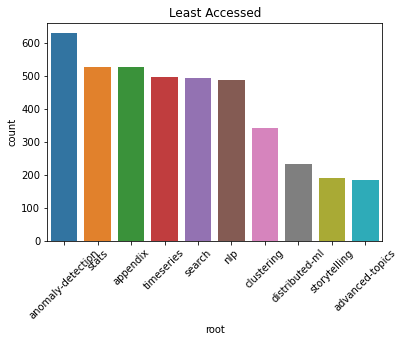

In [115]:
# plot data science least accessed
sns.barplot(data=least_accessed, x='root', y='count')
plt.title('Least Accessed')
plt.xticks(rotation=45);

# The topics that data science students return to the least after graduation are:

1. Advanced Topics

2. Storytelling

3. Distributed Machine Learning

4. Clustering

5. Natural Language Processing

In [116]:
# reset index
wd_topics.reset_index(inplace=True)
# rename columns
wd_topics.columns = ('root', 'count')

In [138]:
# remove lower counts from dataframe
wd_topics = wd_topics[wd_topics['count'] > 10]
# get least accessed topics for data science
least_accessed = wd_topics.tail(10)
least_accessed

,root,count
121,order-by,12
122,Classification_AcquireData,11
123,open_data,11
124,_file_paths,11
125,_KMeans2,11
126,limit,11
127,_navigating_the_filesystem,11
128,cohorts,11
129,_TFIDF,11
130,_Inspect,11


# The topics that web development students return to the least after graduation are:

1. _Inspect

2. _TFIDF

3. _navigating_the_filesystem

4. limit

5. _KMeans2

**Many of the least accessed topics appear to be data science topics. This may be where several web development students still have and are accessing the curriculum**

# Question 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [ ]:
df.head()

In [ ]:
df.info()

### There are user_ids that do not have a start or end date and are not associated with a particular cohort. I am going to check this out.

In [ ]:
# create subset of df where name is null
subset = df[df.name.isnull()]

In [ ]:
subset.head()

In [ ]:
# check the number of unique user ids within this subset
subset.user_id.nunique()

### The function below loops through all users in the subset and returns those whose daily activity exceeds the upper limit of the bollinger band range (pct_b > 1)

In [ ]:
# use functions to loop through each unique user id and get the activity for each user
span = 30
weight = 3

anomalies = pd.DataFrame()
for u in list(subset.user_id.unique()):
    user_df = Lori_wrangle.find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [ ]:
# check data
anomalies

In [ ]:
# sort by number of path views
anomalies.sort_values(by='single_user_data', ascending=False)

#### I am going to eliminate students who have 25 or less page views as it's less likely to be associated with suspicious activity even though it may be out of the norm for them

In [ ]:
# narrow down anomalies to users who have more than 25 page views on any one day
anomalies = anomalies[anomalies.single_user_data > 25]
anomalies

In [ ]:
# check which users have the most days of anomalous activity
anomalies.groupby('user_id').single_user_data.count().sort_values(ascending=False)

In [ ]:

for user in anomalies.user_id.unique():
    df_user = Lori_wrangle.prep_data_by_user(df, user)
    df_user.plot(figsize=(10,6))
    plt.title(user)
    plt.show()